In [1]:
import matplotlib.pyplot as plt
from scipy.linalg import expm,logm, sinm, cosm

In [2]:
from qiskit import BasicAer, Aer
from qiskit import QuantumRegister ,ClassicalRegister,QuantumCircuit
from qiskit import execute

In [3]:
import pennylane as qml
from pennylane import numpy as np

In [4]:
from math_sh import *

In [5]:
# Initial state 
# Gates 
# Observabile 

In [6]:
# Gates

# Initial n qubits circuit.
# Initial gates: U=U_N...U_1
# U_l=exp{ \sum_{j,k=0}^{2n-1} ([h_l]_{j,k}c_jc_k) }

# Copress m qubit circuit.
# Copmress gates: R=R_N..R_1
# R_l=exp{4h_l}


GZB matrix for t =7:

[1, 0, 0, 0]
[0, -0.7539022543433046, 0.6569865987187891, 0]
[0, 0.6569865987187891, 0.7539022543433046]
[0, 0, -1]
circuit matrix:

[[ 1.        +0.j  0.        -0.j  0.        -0.j  0.        -0.j]
 [ 0.        +0.j -0.75390225+0.j  0.6569866 +0.j  0.        +0.j]
 [ 0.        +0.j  0.6569866 +0.j  0.75390225+0.j  0.        +0.j]
 [ 0.        +0.j -0.        +0.j -0.        +0.j -1.        +0.j]]


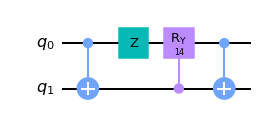

In [7]:
# Initial gates:
# -> matchgaes with the foolowing form :

t=7

def mat_GZB(theta):
    mat=[[1, 0, 0, 0],
         [0, -np.cos(theta), np.sin(theta), 0,],
         [0, np.sin(theta), np.cos(theta),],
         [0, 0, -1,]]
    return mat

print('GZB matrix for t ={}:\n'.format(t))
for i in mat_GZB(t):
    print(i)

# circuit form 
def qiskit_GZB(theta):
    
    gzb= QuantumCircuit(2,name='GZB('+str(theta)+')')
    gzb.cx(0,1)
    gzb.z(0)
    gzb.cry(theta,1,0)
    gzb.cx(0,1)
    gate=gzb.to_gate()
    return gate

circ=QuantumCircuit(2)
circ.append(qiskit_GZB(t*2),[0,1])
circ=circ.decompose()

backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()
print("circuit matrix:\n")
print(result.get_unitary(circ, decimals=3))

circ.draw('mpl')



In [8]:
# Now let's decompose our matrix in products of c_i

# Function to create c group

# Operators for Jordan-Wigner mapping
def get_c(nrq):
    x=[]
    for i in range (nrq):
        x2=X
        x21=Y
        for k in range(i):
            x2=np.kron(Z,x2)
            x21=np.kron(Z,x21)
        for k in range(i+1,nrq):
            x2=np.kron(x2,I)
            x21=np.kron(x21,I)
        x.append(x2)
        x.append(x21)
    return x

class c_op():
    def __init__(self,size):
        self.size=size
        self.elements=get_c(size)
        self.label,self.coef=self.labels()
        self.etichet=self.et()
    def et(self):
        et=[]
        for i in range(self.size*2):
            et.append('c_'+str(i))
        return et
    def labels(self):
        labels=[]
        coef=[]
        for j in self.elements:
            l=[]
            c=[]
            x_j,x_label=decompose(j)
            for i in range(len(x_j)):
                if(abs(x_j[i])!=0):
                    l.append(x_label[i])
                    c.append(x_j[i])
            labels.append(l)
            coef.append(c)
        return labels, coef
    def info(self):
        print('size:',self.size)
        label=self.label
        coef=self.coef
        print('nr. elements:',len(label))
        for i in range(len(label)):
            print(self.etichet[i])
            print('labels:',label[i])
            print('coef:',coef[i])
            print('matrix: \n',self.elements[i])
            print("#################################################")

In [9]:
# Example:

C=c_op(2)
C.info()

size: 2
nr. elements: 4
c_0
labels: ['XI']
coef: [(1+0j)]
matrix: 
 [[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
#################################################
c_1
labels: ['YI']
coef: [(1+0j)]
matrix: 
 [[0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]]
#################################################
c_2
labels: ['ZX']
coef: [(1+0j)]
matrix: 
 [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]]
#################################################
c_3
labels: ['ZY']
coef: [(1+0j)]
matrix: 
 [[ 0.+0.j  0.-1.j  0.+0.j  0.-0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.-0.j -0.+0.j  0.+1.j]
 [ 0.+0.j  0.+0.j -0.-1.j -0.+0.j]]
#################################################


In [10]:
k_1=0
k_2=1
C=c_op(2).elements
a=7
B=1j*((1-np.cos(-a))/4*(np.matmul(C[2*k_1+1],C[2*k_1])-np.matmul(C[2*k_1],C[2*k_1+1]))
         +np.sin(a)/4*(np.matmul(C[2*k_2],C[2*k_1+1])-np.matmul(C[2*k_1+1],C[2*k_2]))
     +(np.cos(-a)+1)/4*(np.matmul(C[2*k_2+1],C[2*k_2])-np.matmul(C[2*k_2],C[2*k_2+1]))
        -np.sin(a)/4*(np.matmul(C[2*k_2+1],C[2*k_1])-np.matmul(C[2*k_1],C[2*k_2+1])))



B_diag= 1j/4*(np.matmul(C[2*k_1],C[2*k_1])+np.matmul(C[2*k_1+1],C[2*k_1+1])
            +np.matmul(C[2*k_2],C[2*k_2])+np.matmul(C[2*k_2+1],C[2*k_2+1]))
B_diag

array([[0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+1.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]])

In [11]:
e=expm(-1j*np.pi/2*B+np.pi/2*B_diag)
print(e)

[[ 1.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.75390225+1.24900090e-16j
   0.6569866 -9.71445147e-17j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.6569866 -5.55111512e-17j
   0.75390225-2.77555756e-17j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j -1.        +2.35127499e-16j]]
